In [36]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from tqdm import tqdm
from scipy.optimize import curve_fit

pairs = []
N_max = 1000000
J_max = 10000
spin_degeneracy = 1
graph_degeneracy = 4

N_max = min(N_max, (J_max-1)**2)
print("Generating pairs")

for i in tqdm(range(1,J_max)):
    for j in range(i+1):
        pairs.append((i,j))
pairs.append((0,0))

print("Evaluating pairs")
vals = [p[0]**2 + p[1]**2 for p in tqdm(pairs)]
ordered = list(zip(vals, pairs))
ordered.sort()
ordered = np.array(ordered[:N_max])

Generating pairs


100%|██████████| 9999/9999 [00:30<00:00, 330.84it/s] 


Evaluating pairs


100%|██████████| 50005000/50005000 [01:27<00:00, 573409.35it/s]
C:\Users\sfska\AppData\Local\Temp\ipykernel_14940\685814575.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ordered = np.array(ordered[:N_max])


C:\Users\sfska\AppData\Local\Temp\ipykernel_14940\781489027.py:9: RuntimeWarning: divide by zero encountered in power
  upper_line = lambda x, m=m, b=b: 10**b * np.power(x,m)
C:\Users\sfska\AppData\Local\Temp\ipykernel_14940\781489027.py:14: RuntimeWarning: divide by zero encountered in power
  lower_line = lambda x, m=m, b=b: 10**b * np.power(x,m)


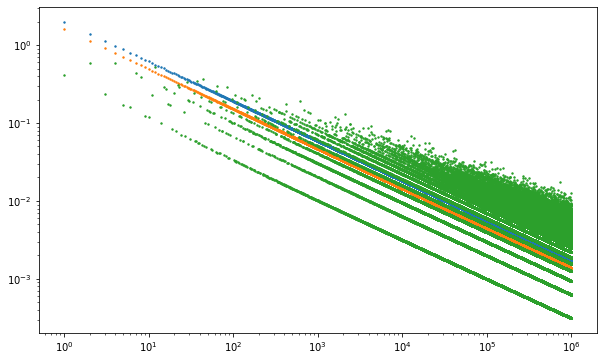

In [37]:
raw_values = [sqrt(o) for o in ordered[:,0]]
diffs = [raw_values[i+1] - raw_values[i] for i in range(len(raw_values)-1)]

domain = np.array([i for i in range(len(diffs))], dtype=float)


m = -.51
b = 0.3
upper_line = lambda x, m=m, b=b: 10**b * np.power(x,m)

# m=-
b=0.2

lower_line = lambda x, m=m, b=b: 10**b * np.power(x,m)

def filter_data(domain, data, lower, upper):
    filtered = []
    filtered_domain = []
    for i,d in enumerate(domain):
        if lower([d]) < data[i] < upper([d]):
            filtered_domain.append(d)
            filtered.append(data[i])
    return filtered_domain, filtered

plt.figure(figsize=(10,6))

plt.scatter(domain, upper_line(domain), s=2)
plt.scatter(domain, lower_line(domain), s=2)
plt.scatter(domain, diffs, s = 2)
plt.xscale('log')
plt.yscale('log')
plt.show()

filtered_domain, filtered = filter_data(domain, diffs, lower_line, upper_line)


C:\Users\sfska\AppData\Local\Temp\ipykernel_14940\1920119112.py:2: RuntimeWarning: divide by zero encountered in power
  return a*np.power(x,b)
C:\Users\sfska\AppData\Local\Temp\ipykernel_14940\1920119112.py:2: RuntimeWarning: invalid value encountered in multiply
  return a*np.power(x,b)


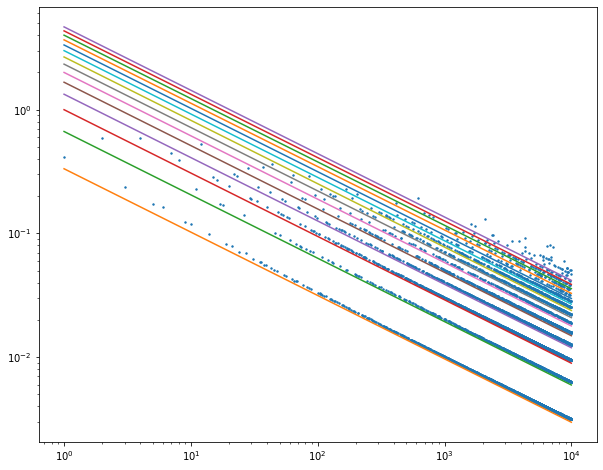

(1.7113391478712314, -0.509191590435085)


In [4]:
def E_dE_func(x, a, b):
    return a*np.power(x,b)

def E_dE_regression(inputs, outputs):
    p = np.polyfit(np.log(inputs[1:]), np.log(outputs[1:]),1)
    a,b = p
    fitted = lambda x, a=a, b=b: E_dE_func(x, e**b, a)
    return fitted, (e**b, a)

trial_func, coeffs = E_dE_regression(filtered_domain, filtered)


lines = [lambda x, a=0.3333*i, b=-0.512: E_dE_func(x, a, b) for i in range(15)]


plt.figure(figsize=(10,8))
for line in lines:
    plt.plot(domain, line(domain))
plt.scatter(domain, diffs, s=2)
plt.xscale('log')
plt.yscale('log')
plt.savefig("graphs/log-log-weirdness")
plt.show()
print(coeffs)

[0.3454263139369581, 0.34720975735750026, 0.3319146857115305, 0.33095058318782034]


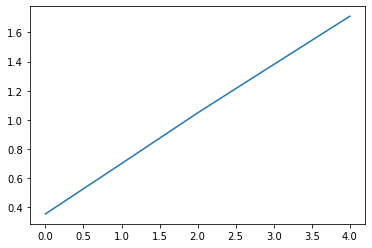

In [5]:
inps = [0.35583780767742224, 0.7012641216143803, 1.0484738789718806, 1.380388564683411, 1.7113391478712314]

differences = [inps[i+1] - inps[i] for i in range(len(inps)-1)]
print(differences)

plt.plot(inps)
plt.show()

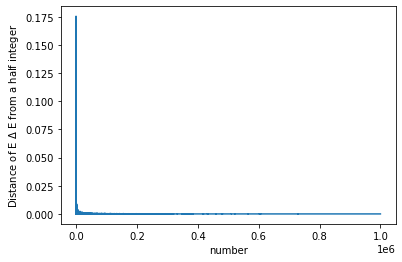

In [39]:
alphas = np.array(raw_values[1:])*np.array(diffs)


# map to see how far away on average we are from half integers
epsilons = (2*alphas - np.array([int(2*a) for a in alphas]))/2


plt.plot(epsilons)
# plt.yscale('log')
plt.xlabel("number")
plt.ylabel("Distance of E $\Delta$ E from a half integer")

plt.savefig("graphs/Half integers")
plt.show()

